In [1]:
setwd("D:\\Winter 2020\\BAX 442 Advanced Statistics\\Class 3\\Class 3")
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [4]:
#install.packages('pls')
library(pls)

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\xingxuan_dell\AppData\Local\Temp\RtmpSEiCS2\downloaded_packages


Warning message:
"package 'pls' was built under R version 3.6.2"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [16]:
data=read.csv("Cars_Data.csv", header=T,row.names="Brands")
data

,Attractive,Quiet,Unreliable,Poorly.Built,Interesting,Sporty,Uncomfortable,Roomy,Easy.Service,Prestige,Common,Economical,Successful,AvantGarde,Poor.Value,Overall.Preference
Infinity,5.6,6.3,2.9,1.6,3.6,4.1,3.2,4.2,4.6,6.4,3.5,3.6,5.3,4.3,3.4,6.3
Ford,4.0,3.6,4.2,4.2,5.0,4.9,4.0,3.9,4.9,3.5,3.6,3.7,4.2,3.6,4.3,3.9
Audi,4.6,5.2,3.7,2.6,4.0,3.8,2.4,5.3,3.5,5.6,3.4,3.6,5.0,3.6,4.3,6.0
Toyota,5.6,4.2,2.0,2.1,4.3,6.2,3.7,3.5,4.9,5.3,2.9,3.2,5.5,4.9,3.5,5.5
Eagle,4.0,3.5,4.3,4.3,3.9,4.9,4.0,3.6,4.6,2.8,4.3,4.9,3.7,4.4,3.6,4.0
Honda,5.2,5.4,3.2,2.8,3.4,5.1,3.3,3.9,5.0,4.7,3.9,5.0,5.6,3.9,2.6,6.5
Saab,5.3,4.8,3.7,2.8,3.4,4.3,2.5,5.8,3.8,5.4,1.9,4.3,5.3,4.7,2.9,6.8
Pontiac,3.9,2.8,3.9,4.4,5.4,5.7,4.3,3.3,4.7,3.8,4.3,3.1,4.4,4.1,4.3,3.0
BMW,5.7,5.0,2.3,1.8,3.3,4.1,3.5,4.3,4.1,6.4,2.8,4.3,5.9,3.7,3.3,6.7
Mercury,3.9,3.3,4.0,4.3,3.9,5.2,4.4,3.6,4.6,3.3,3.9,4.6,3.9,4.5,3.8,4.0


In [18]:
y=data[,16]
x=as.matrix(data[,1:15])

# 1. Build a positioning map for the car brands, where the number of attributes exceed the number of brands (p > N)


In [19]:
set.seed(1)
pcr.fit = pcr(y~x,validation='CV')
summary(pcr.fit)

Data: 	X dimension: 10 15 
	Y dimension: 10 1
Fit method: svdpc
Number of components considered: 8

VALIDATION: RMSEP
Cross-validated using 10 leave-one-out segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.482   0.5388   0.5138   0.3552   0.3595   0.3748   0.3523
adjCV        1.482   0.5323   0.5066   0.3454   0.3490   0.3686   0.3400
       7 comps  8 comps
CV      0.3730   0.4376
adjCV   0.3614   0.4175

TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X    64.01    78.83    88.43    94.54    96.72    98.44    99.33    99.86
y    90.59    92.72    97.58    98.32    98.39    99.45    99.56    99.89


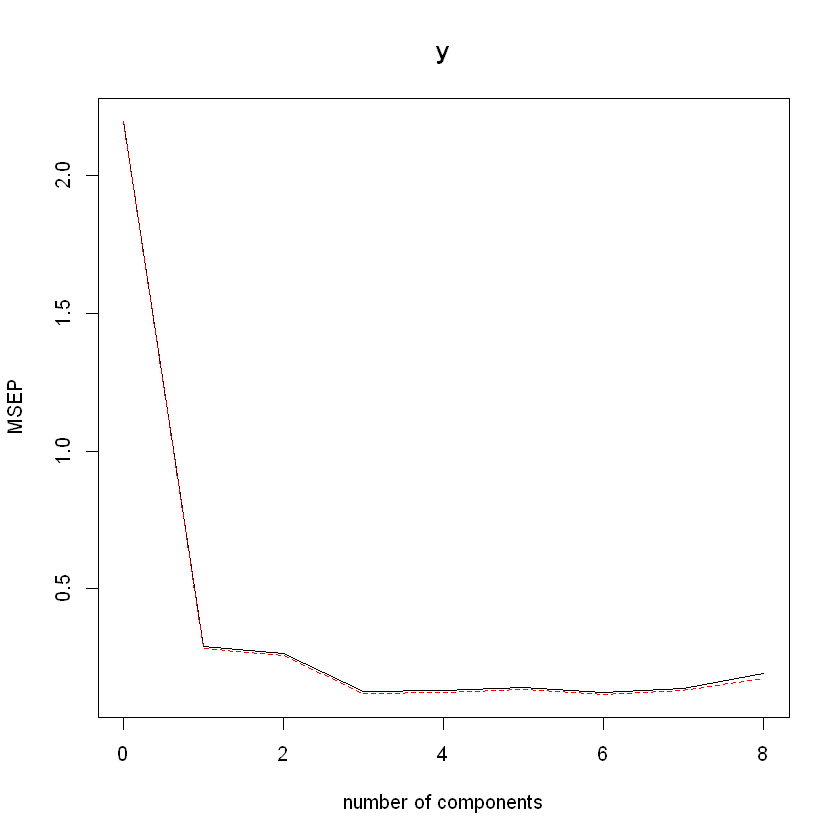

In [20]:
validationplot(pcr.fit,val.type='MSEP')

In [21]:
pcr.fit = pcr(y~x,ncomp=2)
summary(pcr.fit)

Data: 	X dimension: 10 15 
	Y dimension: 10 1
Fit method: svdpc
Number of components considered: 2
TRAINING: % variance explained
   1 comps  2 comps
X    64.01    78.83
y    90.59    92.72


In [30]:
coef(pcr.fit)

, , 2 comps

                        y
Attractive     0.11931757
Quiet          0.22882123
Unreliable    -0.04726591
Poorly.Built  -0.19067110
Interesting   -0.12852186
Sporty        -0.16313723
Uncomfortable -0.15847188
Roomy          0.18037968
Easy.Service  -0.09289619
Prestige       0.24245607
Common        -0.12031095
Economical     0.03160223
Successful     0.11612135
AvantGarde    -0.02233560
Poor.Value    -0.06282472

https://bookdown.org/content/1340/principal-components-analysis.html

https://rdrr.io/cran/pls/man/scores.html

In [28]:
yhat = predict(pcr.fit)
sse = sum((y - yhat)^2)
sst = sum((y-mean(y))^2)
r2 = 1-sse/sst

In [29]:
r2

[1] 0.833081

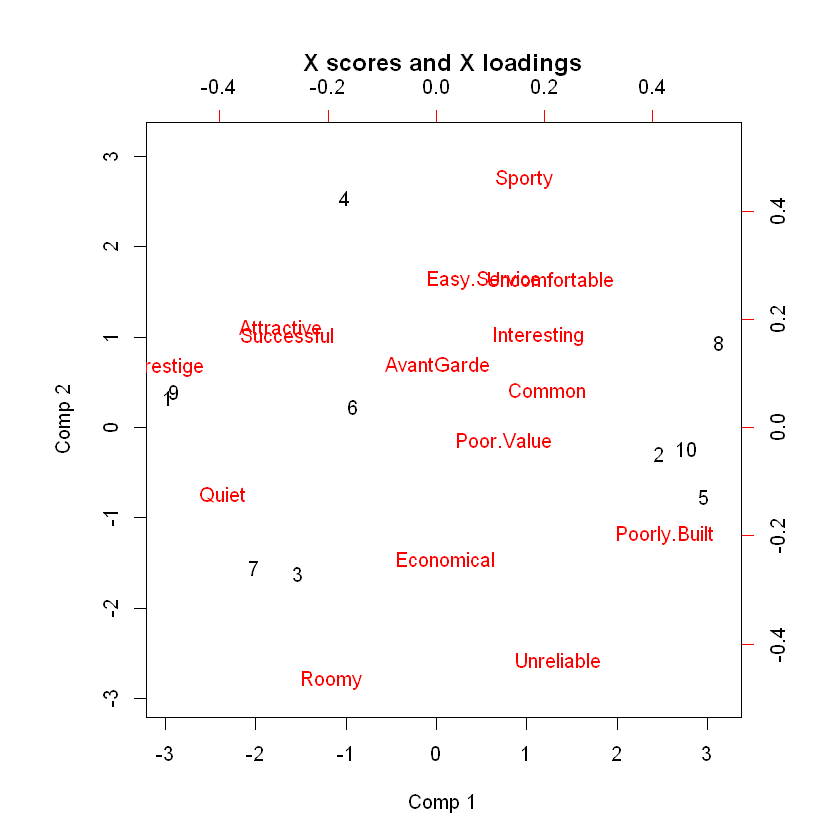

In [22]:
biplot(pcr.fit)

In [42]:
weight_1 <- loadings(pcr.fit)[,1]
weight_2 <- loadings(pcr.fit)[,2]
z1 = x %*% weight_1
z2 = x %*% weight_2

In [44]:
lm_z <- lm(y~z1+z2)
summary(lm(y~z1+z2))


Call:
lm(formula = y ~ z1 + z2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47926 -0.28862  0.04423  0.16289  0.78397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.86983    0.33720  14.442 1.82e-06 ***
z1          -0.52774    0.05655  -9.332 3.37e-05 ***
z2          -0.16816    0.11752  -1.431    0.196    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4303 on 7 degrees of freedom
Multiple R-squared:  0.9272,	Adjusted R-squared:  0.9064 
F-statistic: 44.57 on 2 and 7 DF,  p-value: 0.0001042


In [45]:
b1=as.vector(coef(lm_z)[2])
b2=as.vector(coef(lm_z)[3])

slope.iso.preference = - b1/b2
slope.ideal.vector = b2/b1 

angle.iso.preference = atan(slope.iso.preference)*180/pi
angle.ideal.vector = atan(slope.ideal.vector)*180/pi


In [46]:
slope.iso.preference

[1] -3.138218

In [47]:
slope.ideal.vector

[1] 0.3186522

In [48]:
angle.iso.preference

[1] -72.32541

In [49]:
angle.ideal.vector

[1] 17.67459